## Hybrid Genetic Search meta-heuristic example

This notebook uses `optiwindnet` to route the collector system cables using metaheuristic solver.

The meta-heuristic used is [vidalt/HGS-CVRP: Modern implementation of the hybrid genetic search (HGS) algorithm specialized to the capacitated vehicle routing problem (CVRP). This code also includes an additional neighborhood called SWAP\*.](https://github.com/vidalt/HGS-CVRP)

HGS-CVRP can only produce *radial* topologies. Since a *radial* topology is a special case of the *branched* topology, solutions produced by this method can be used to warm-start both *branched*- and *radial*-topology models.

In [207]:
from optiwindnet.api import WindFarmNetwork, MetaHeuristic, load_repository

### Load Hornsea

In [208]:
locations = load_repository()

In [209]:
wfn = WindFarmNetwork(L=locations.hornsea, cables=7)

<Axes: >

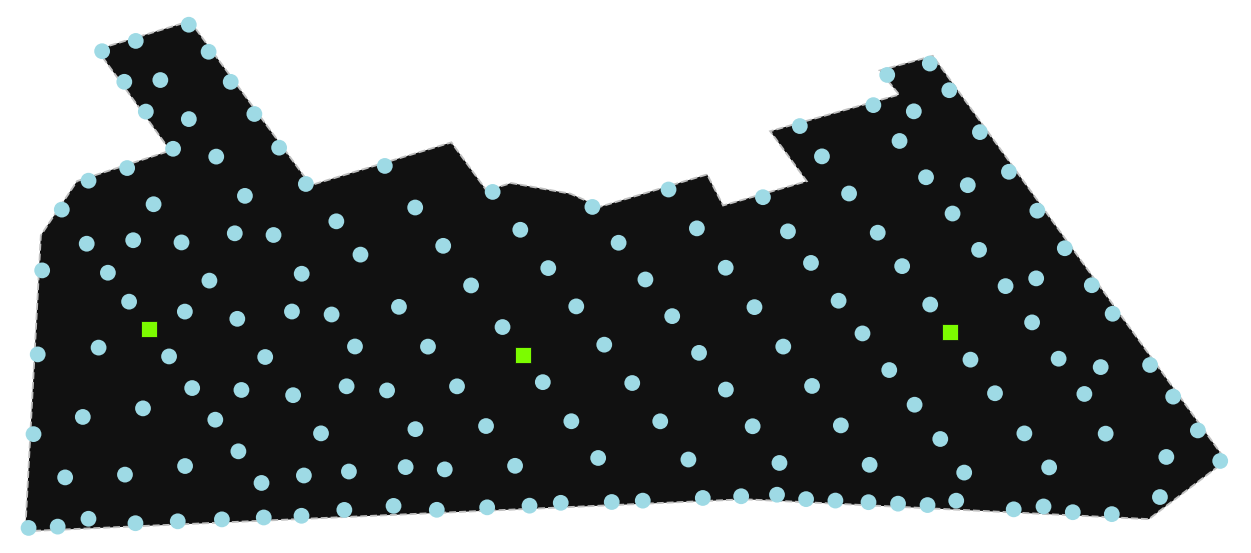

In [210]:
wfn.plot_location()

### Optimize Hornsea with HGS

In [211]:
router = MetaHeuristic(solver= 'hgs',time_limit=0.5)

In [212]:
res = wfn.optimize(router=router)

In [213]:
wfn.length()

282390.3976533849

Plot the Optimized Network Graph

<Axes: >

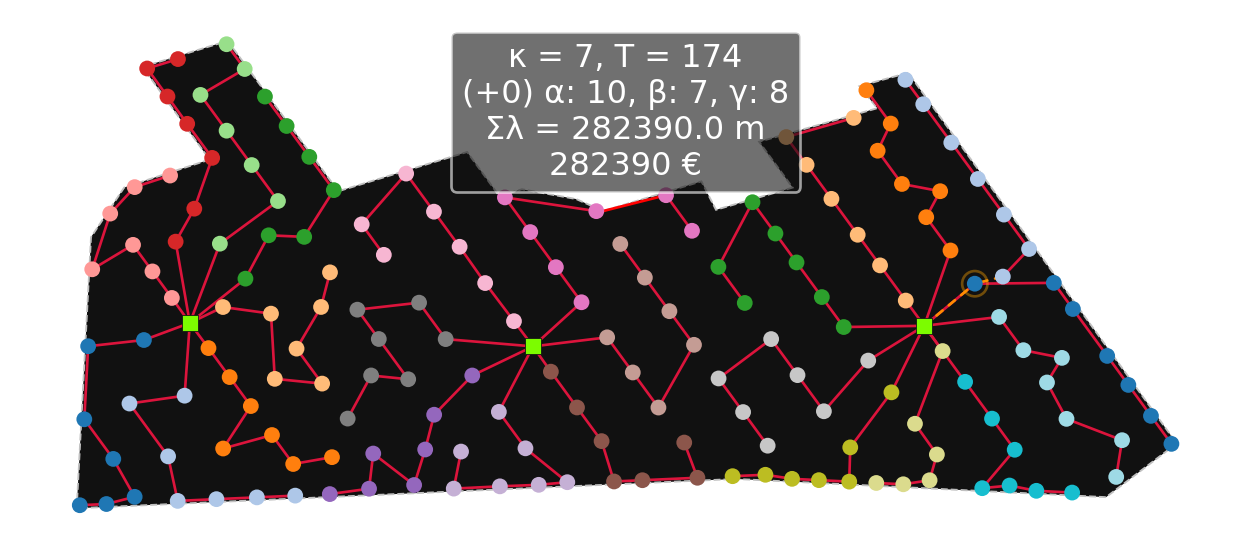

In [214]:
wfn.plot()

Get solution time

In [215]:
print(wfn.S.graph['solution_time'])

(0.22, 0.19, 0.26)
